# Poverty Index in Mexico -  Forecast Analysis

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
from sklearn.metrics import mean_absolute_error as mae
from utils import get_csv

#Set random seeds
tf.random.set_seed(42)
seed(42)
random.seed(42)
set_random_seed(42)

## Data Import and Cleaning

In [12]:
df = pd.read_csv("data/Labor_Poverty.csv", index_col=0) #imported data
df.index

Index(['ene-05', 'abr-05', 'jul-05', 'nov-05', 'ene-06', 'abr-06', 'jul-06',
       'nov-06', 'ene-07', 'abr-07', 'jul-07', 'nov-07', 'ene-08', 'abr-08',
       'jul-08', 'nov-08', 'ene-09', 'abr-09', 'jul-09', 'nov-09', 'ene-10',
       'abr-10', 'jul-10', 'nov-10', 'ene-11', 'abr-11', 'jul-11', 'nov-11',
       'ene-12', 'abr-12', 'jul-12', 'nov-12', 'ene-13', 'abr-13', 'jul-13',
       'nov-13', 'ene-14', 'abr-14', 'jul-14', 'nov-14', 'ene-15', 'abr-15',
       'jul-15', 'nov-15', 'ene-16', 'abr-16', 'jul-16', 'nov-16', 'ene-17',
       'abr-17', 'jul-17', 'nov-17', 'ene-18', 'abr-18', 'jul-18', 'nov-18',
       'ene-19', 'abr-19', 'jul-19', 'nov-19', 'ene-20', 'abr-20', 'jul-20',
       'nov-20', 'ene-21', 'abr-21', 'jul-21', 'nov-21', 'ene-22', 'abr-22',
       'jul-22', 'nov-22', 'ene-23'],
      dtype='object')

In [17]:
df = get_csv()
df

,National,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila de Zaragoza,Colima,Chiapas,Chihuahua,Ciudad de México,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
2005-01-01,38.1,34.0,14.4,18.4,41.7,29.6,24.0,69.6,26.4,22.6,...,22.8,46.7,24.8,25.7,45.6,30.9,45.8,49.4,45.6,52.8
2005-04-01,38.8,32.1,13.8,17.9,42.0,29.1,23.5,69.2,25.5,24.1,...,23.2,47.5,28.0,23.6,44.1,34.1,46.9,50.6,46.6,51.1
2005-07-01,38.1,32.3,15.1,17.4,42.8,27.7,22.6,68.0,25.8,23.9,...,23.4,47.8,28.9,25.3,41.2,29.7,47.5,49.1,45.8,49.5
2005-11-01,36.6,30.0,13.4,15.8,39.7,26.5,23.6,69.5,24.5,20.7,...,22.3,46.2,25.1,23.8,40.8,26.9,44.9,47.9,44.7,46.6
2006-01-01,36.1,31.4,14.3,15.7,41.2,26.6,22.9,67.8,20.5,20.4,...,20.6,43.6,21.8,21.9,37.9,27.8,45.4,46.2,44.4,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,38.8,36.2,17.8,17.2,37.9,27.3,24.7,65.3,26.0,35.9,...,30.7,40.9,27.8,28.8,44.1,33.4,48.2,51.9,35.1,49.5
2022-04-01,38.3,37.2,19.5,15.8,41.0,26.1,24.2,66.8,24.1,32.8,...,28.4,40.9,27.8,28.7,44.9,32.0,47.4,51.9,34.8,45.4
2022-07-01,40.1,38.8,21.1,15.6,42.7,24.8,25.8,69.6,24.2,35.6,...,28.8,43.3,31.5,30.7,46.3,33.7,48.0,54.7,34.8,47.8
2022-11-01,38.5,39.9,19.8,15.8,42.0,23.2,27.2,68.8,22.6,31.4,...,25.6,42.5,26.5,28.1,43.0,32.8,47.8,50.9,34.6,53.1


In [18]:
df = df.replace({"ND": None}) # Removed superfluous data
df = df.astype("float") # Changed data types
df = df.transpose() # Transpose the table
df['2020-04-01'] = (df['2020-01-01'] + df['2020-07-01'])/2 # #Interpolated missing value with simple average // TO-DO: Use the average all the 3 quarter for 2020 to interpolate.
# df.columns = pd.to_datetime(df.columns, format="%m-%Y") # WRONG: Cast column data type to datetime
df

,2005-01-01,2005-04-01,2005-07-01,2005-11-01,2006-01-01,2006-04-01,2006-07-01,2006-11-01,2007-01-01,2007-04-01,...,2020-11-01,2021-01-01,2021-04-01,2021-07-01,2021-11-01,2022-01-01,2022-04-01,2022-07-01,2022-11-01,2023-01-01
National,38.1,38.8,38.1,36.6,36.1,35.0,35.7,36.2,36.4,34.6,...,42.0,42.0,39.9,40.7,40.3,38.8,38.3,40.1,38.5,37.7
Aguascalientes,34.0,32.1,32.3,30.0,31.4,30.6,29.6,31.4,33.0,31.0,...,35.5,34.8,34.7,35.4,34.8,36.2,37.2,38.8,39.9,37.4
Baja California,14.4,13.8,15.1,13.4,14.3,13.6,13.5,15.8,14.7,12.8,...,25.9,26.7,21.6,23.0,22.4,17.8,19.5,21.1,19.8,18.7
Baja California Sur,18.4,17.9,17.4,15.8,15.7,13.6,13.8,12.3,14.3,14.2,...,26.1,28.2,23.8,19.6,15.6,17.2,15.8,15.6,15.8,15.6
Campeche,41.7,42.0,42.8,39.7,41.2,38.8,38.3,39.1,39.1,37.9,...,43.8,43.2,41.2,43.7,39.9,37.9,41.0,42.7,42.0,41.8
Coahuila de Zaragoza,29.6,29.1,27.7,26.5,26.6,25.4,25.3,25.7,25.9,24.3,...,28.6,28.0,27.3,27.8,26.9,27.3,26.1,24.8,23.2,27.2
Colima,24.0,23.5,22.6,23.6,22.9,19.4,21.2,22.3,23.5,21.1,...,30.5,30.5,25.2,24.6,23.8,24.7,24.2,25.8,27.2,24.9
Chiapas,69.6,69.2,68.0,69.5,67.8,68.4,67.3,68.7,69.4,63.6,...,68.1,68.1,65.3,68.5,69.3,65.3,66.8,69.6,68.8,67.2
Chihuahua,26.4,25.5,25.8,24.5,20.5,19.8,22.4,22.0,21.9,21.5,...,28.5,29.7,25.6,28.7,26.0,26.0,24.1,24.2,22.6,27.2
Ciudad de México,22.6,24.1,23.9,20.7,20.4,22.1,22.5,22.3,21.4,21.0,...,41.8,44.6,40.4,37.9,37.4,35.9,32.8,35.6,31.4,29.7


## Modeling

Do train/test split among the 32 states for baseline.  Model may not generalize if we get a sample of states that don't capture diversity of poverty among different...urban vs. rural etc.

## First try: leave last column for forecast comparision and forecast a year from and including last column, in other words forecast all of 2023.

In [19]:
# Just slice off more columns for longer forecast.
arr = np.expand_dims(df.to_numpy(), axis=2)
X = arr[:,0:-2,:] # All quarters except the last two
y = arr[:,-2,:]
y_lqrt = arr[:,-1,:] # Last quarter

In [20]:
X[:,-1,:];

In [21]:
y_lqrt;

In [22]:
X.shape[1:]

(71, 1)

In [23]:
# Spliting the Data, holding back last column to check forecast accuracy on column that model hasn't seen.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Split data into 80% train, 20% test

In [24]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten
from tensorflow.keras.callbacks import EarlyStopping

### Baseline Setup (SAVE this one for first API)

In [25]:
def compile_model(model):
    model.compile(loss='mae',
                  optimizer='adam', 
                  metrics=['mae'])
    return model

def fit_model(X,X_train,y_train):
    model = Sequential()
    model.add(SimpleRNN(input_shape=X.shape[1:], units=10, activation='tanh', return_sequences=False))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # Compiling the RNN
    model = compile_model(model)
    
    #Baseline Training
    es = EarlyStopping(patience=15, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        batch_size=8, 
                        epochs=1000, 
                        callbacks=[es],
                        verbose=1)
    return history, model

In [29]:
history, model = fit_model(X, X_train, y_train)

Epoch 1/1000
3/3 [==============================] - 4s 460ms/step - loss: 35.1715 - mae: 35.1715 - val_loss: 44.3961 - val_mae: 44.3961
Epoch 2/1000
3/3 [==============================] - 0s 135ms/step - loss: 35.0684 - mae: 35.0684 - val_loss: 44.2921 - val_mae: 44.2921
Epoch 3/1000
3/3 [==============================] - 0s 128ms/step - loss: 34.9641 - mae: 34.9641 - val_loss: 44.1868 - val_mae: 44.1868
Epoch 4/1000
3/3 [==============================] - 0s 101ms/step - loss: 34.8584 - mae: 34.8584 - val_loss: 44.0801 - val_mae: 44.0801
Epoch 5/1000
3/3 [==============================] - 0s 99ms/step - loss: 34.7513 - mae: 34.7513 - val_loss: 43.9717 - val_mae: 43.9717
Epoch 6/1000
3/3 [==============================] - 0s 110ms/step - loss: 34.6425 - mae: 34.6425 - val_loss: 43.8616 - val_mae: 43.8616
Epoch 7/1000
3/3 [==============================] - 0s 92ms/step - loss: 34.5319 - mae: 34.5319 - val_loss: 43.7496 - val_mae: 43.7496
Epoch 8/1000
3/3 [==============================] 

In [30]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 70ms/step - loss: 1.6924 - mae: 1.6924


[1.6923569440841675, 1.6923569440841675]

Off by 2.17% MAE on the test set.

In [31]:
y_pred = model.predict(X)

2/2 [==============================] - 0s 18ms/step


In [32]:
mae(y_pred,y_lqrt)

2.45008185415557

Prediction on last quarter has 1.958% MAE.  So our prediction for 01-2023 is off by this much.

In [33]:
X.shape

(33, 71, 1)

In [36]:
#Forecast further out based on the beginning X.  This for beyond quarters for target.
# Returns a yearly forecast given the model and X.
# The forecast is for a year (4 quarters after the target,y)

def yearly_forecast(model,X):    
    pred = model.predict(X);
    forecast = pred
    # Complete a year's worth of forecast
    for i in range(3):
        # Drop first column of X, append previous prediction.
        X_temp = X[:,1:] 

        # Append previous prediction at the end of the X_temp
        X_temp = np.append(X_temp, pred[:, np.newaxis], axis=1)
        
        # Predict next quarter, using previous prediction
        pred = model.predict(X_temp);
        forecast = np.c_[forecast,pred]
    return forecast

forecast = yearly_forecast(model,X);


2/2 [==============================] - 0s 51ms/step


In [37]:
columns = ['01-2023','04-2023','07-2023','11-2023']
df_forecast = pd.DataFrame(forecast,index = df.index, columns = columns)
df_forecast

,01-2023,04-2023,07-2023,11-2023
National,39.161339,38.210518,37.176075,36.065491
Aguascalientes,37.749191,36.620350,35.395874,34.085907
Baja California,20.144787,18.941320,17.640436,16.434780
Baja California Sur,15.837337,16.286798,16.917774,17.813828
Campeche,42.145744,41.379894,40.562561,39.691250
Coahuila de Zaragoza,23.382650,20.987356,18.190098,16.009005
Colima,26.313797,23.138882,18.977665,15.834371
Chiapas,54.731953,50.711906,47.950802,45.719425
Chihuahua,24.679724,21.662315,18.086266,15.625455
Ciudad de México,34.356449,32.851372,31.115067,29.000053


In [38]:
df_forecast.to_csv('output/model_prediction.csv')

STOP here.

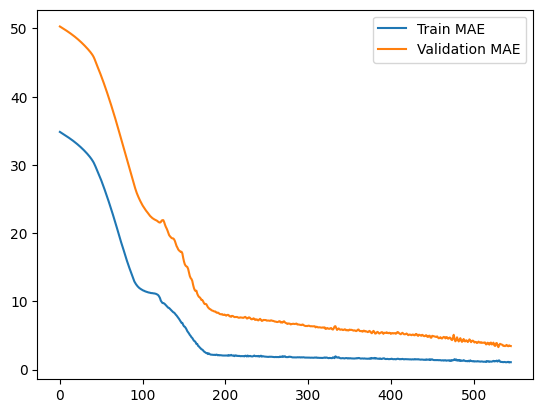

In [ ]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

## Second try: train the model on full data set, and get 1-year forecast into the future.

In [ ]:
arr_full = np.expand_dims(df.to_numpy(), axis=2)
X = arr_full[:,:-1,:]
y = arr_full[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Building the RNN architecture
model_full = Sequential()
model_full.add(SimpleRNN(input_shape=(72, 1), units=10, activation='tanh', return_sequences=False))
model_full.add(Dense(15, activation='relu'))
model_full.add(Dense(1, activation='linear'))

# Compiling the RNN
model_full = compile_model(model_full)

#Baseline Training
es = EarlyStopping(patience=15, restore_best_weights=True)
history = model_full.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=8, 
                    epochs=1000, 
                    callbacks=[es],
                    verbose=1)

Epoch 1/1000
3/3 [==============================] - 0s 63ms/step - loss: 30.0506 - mae: 30.0506 - val_loss: 45.4884 - val_mae: 45.4884
Epoch 2/1000
3/3 [==============================] - 0s 62ms/step - loss: 29.7724 - mae: 29.7724 - val_loss: 45.1655 - val_mae: 45.1655
Epoch 3/1000
3/3 [==============================] - 0s 90ms/step - loss: 29.4857 - mae: 29.4857 - val_loss: 44.8381 - val_mae: 44.8381
Epoch 4/1000
3/3 [==============================] - 0s 84ms/step - loss: 29.2006 - mae: 29.2006 - val_loss: 44.5361 - val_mae: 44.5361
Epoch 5/1000
3/3 [==============================] - 0s 83ms/step - loss: 28.9276 - mae: 28.9276 - val_loss: 44.2370 - val_mae: 44.2370
Epoch 6/1000
3/3 [==============================] - 0s 63ms/step - loss: 28.6458 - mae: 28.6458 - val_loss: 43.9446 - val_mae: 43.9446
Epoch 7/1000
3/3 [==============================] - 0s 64ms/step - loss: 28.3545 - mae: 28.3545 - val_loss: 43.6381 - val_mae: 43.6381
Epoch 8/1000
3/3 [==============================] - 0s 

# 

## 

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9681ab42-863e-4777-a44c-6086fcfadbac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>